In [1]:
import pandas as pd
from utils import downloadData,extract_file,to_dataframe,supprimer_lignes_na
from ml_tool import assess_NA,smooth,feature_importance
from ml_algorithms import SVM_Grid_search,SVM_Cross_val,ANN_grid_search

2023-05-26 23:08:57.588237: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-26 23:08:58.383845: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load li

In [2]:
import plotly.express as px
import numpy as np

# Data Statitic 

In [3]:
df=pd.read_excel('final.xlsx')

In [4]:
"""def feature_importance(X, y):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import RandomForestClassifier
    import matplotlib.pyplot as plt
    import numpy as np

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    # Feature scaling
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    # Train the model
    forest = RandomForestClassifier()
    forest.fit(X_train_std, y_train.values.ravel())
    importances = forest.feature_importances_

    # Sort the feature importance in descending order
    sorted_indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))  # Increase the size of the figure
    plt.title('Feature Importance')

    feature_sets = [['RDAmpM', 'RDAmpSD',  'mean_rr', 'sdsd', 'pnn50', 'rmssd', 'sdnn', 'hf_power', 'hfnu'], 
                    ['QRsa', 'QRaSD'], 
                    ['pos_area', 'neg_area']]
    colors = ['b', 'g', 'r']  # Define colors for each feature set

    for i, feature_set in enumerate(feature_sets):
        indices = [list(X.columns).index(f) for f in feature_set if f in X.columns]
        sorted_indices_subset = [idx for idx in sorted_indices if idx in indices]
        plt.barh(sorted_indices_subset, importances[sorted_indices_subset], 
                 color=colors[i], align='center')
    
    plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_indices])
    plt.ylabel('Features')  # Add y-label
    plt.xlabel('Importance')  # Add x-label
    plt.grid(True)  # Add grid
    plt.tight_layout()

    # Save the figure in the current directory
    plt.savefig('feature_importance.png')
    plt.show()"""

"def feature_importance(X, y):\n    from sklearn.model_selection import train_test_split\n    from sklearn.preprocessing import StandardScaler\n    from sklearn.ensemble import RandomForestClassifier\n    import matplotlib.pyplot as plt\n    import numpy as np\n\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)\n    \n    # Feature scaling\n    sc = StandardScaler()\n    sc.fit(X_train)\n    X_train_std = sc.transform(X_train)\n    X_test_std = sc.transform(X_test)\n\n    # Train the model\n    forest = RandomForestClassifier()\n    forest.fit(X_train_std, y_train.values.ravel())\n    importances = forest.feature_importances_\n\n    # Sort the feature importance in descending order\n    sorted_indices = np.argsort(importances)[::-1]\n\n    plt.figure(figsize=(10, 6))  # Increase the size of the figure\n    plt.title('Feature Importance')\n\n    feature_sets = [['RDAmpM', 'RDAmpSD',  'mean_rr', 'sdsd', 'pnn50', 'rmssd', 'sdnn', 'hf_power', 'hf

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95228 entries, 0 to 95227
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.2  95228 non-null  int64  
 1   Unnamed: 0.1  95228 non-null  int64  
 2   Unnamed: 0    95228 non-null  int64  
 3   label         95228 non-null  object 
 4   signal        95228 non-null  object 
 5   channel       95228 non-null  object 
 6   db            95228 non-null  object 
 7   fs            95228 non-null  int64  
 8   RDAmpM        95228 non-null  float64
 9   RDAmpSD       95228 non-null  float64
 10  QRsa          95228 non-null  float64
 11  QRaSD         95228 non-null  float64
 12  S             95228 non-null  object 
 13  Q             95228 non-null  object 
 14  R             95228 non-null  object 
 15  mean_rr       95228 non-null  float64
 16  sdsd          95228 non-null  float64
 17  pnn50         95228 non-null  float64
 18  rmssd         95228 non-nu

In [6]:
print(df[df["label"] == "NotVF"].count())

Unnamed: 0.2    88487
Unnamed: 0.1    88487
Unnamed: 0      88487
label           88487
signal          88487
channel         88487
db              88487
fs              88487
RDAmpM          88487
RDAmpSD         88487
QRsa            88487
QRaSD           88487
S               88487
Q               88487
R               88487
mean_rr         88487
sdsd            88487
pnn50           88487
rmssd           88487
sdnn            88487
lf_power        88487
hf_power        88487
pos_area        88487
neg_area        88487
vlf_power       88487
ulf_power       88487
lfnu            88487
hfnu            88487
dtype: int64


In [7]:
print(df[df["label"] == "VF"].count())

Unnamed: 0.2    6741
Unnamed: 0.1    6741
Unnamed: 0      6741
label           6741
signal          6741
channel         6741
db              6741
fs              6741
RDAmpM          6741
RDAmpSD         6741
QRsa            6741
QRaSD           6741
S               6741
Q               6741
R               6741
mean_rr         6741
sdsd            6741
pnn50           6741
rmssd           6741
sdnn            6741
lf_power        6741
hf_power        6741
pos_area        6741
neg_area        6741
vlf_power       6741
ulf_power       6741
lfnu            6741
hfnu            6741
dtype: int64


## ANN 

In [8]:
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from keras.layers import Dropout
import matplotlib.pyplot as plt
    
import numpy as np
import torch
from torch.nn.modules.module import Module
from torch.optim.lr_scheduler import ReduceLROnPlateau


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score ,roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def neural_network(X, y, learning_rate=0.001, activation_function='relu', init='normal', neuron1=4, neuron2=2, epochs=1000, batch_size=20, output_path="", early_stop_patience=10,name="you"):

    # Get the number of features (input dimension) from X
    input_dim = X.shape[1]

    # Instantiate the encoder
    le = LabelEncoder()

    # Fit and transform the target variable y
    y = le.fit_transform(y)

    # Function to create model, required for KerasClassifier
    class ANN(nn.Module):
        def __init__(self):
            super(ANN, self).__init__()

            activation_functions = {
                'relu': nn.ReLU(),
                'tanh': nn.Tanh(),
                'sigmoid': nn.Sigmoid(),
                'softmax': nn.Softmax(dim=1)
            }

            init_methods = {
                'normal': nn.init.normal_,
                'uniform': nn.init.uniform_,
                'xavier': nn.init.xavier_uniform_
            }

            self.activation_function = activation_functions[activation_function]

            self.fc1 = nn.Linear(input_dim, neuron1)
            init_methods[init](self.fc1.weight)

            self.fc2 = nn.Linear(neuron1, neuron2)
            init_methods[init](self.fc2.weight)

            self.fc3 = nn.Linear(neuron2, 1)
            init_methods[init](self.fc3.weight)

            self.bn1 = nn.BatchNorm1d(neuron1)
            self.bn2 = nn.BatchNorm1d(neuron2)

        def forward(self, x):
            x = self.activation_function(self.fc1(x))
            x = self.bn1(x)
            x = self.activation_function(self.fc2(x))
            x = self.bn2(x)
            x = torch.sigmoid(self.fc3(x))
            return x
    
    


    class EarlyStopping:
        
        def __init__(self, patience=10, mode="min", delta=0.0, monitor="val_loss"):
            self.patience = patience
            self.counter = 0
            self.mode = mode
            self.best_score = None
            self.early_stop = False
            self.delta = delta
            self.monitor = monitor
            if self.mode == "min":
                self.val_score = np.Inf
            else:
                self.val_score = -np.Inf

        def __call__(self, epoch_score, model, model_path):

            if self.mode == "min":
                score = -1.0 * epoch_score
            else:
                score = np.copy(epoch_score)

            if self.best_score is None:
                self.best_score = score
                self.save_checkpoint(epoch_score, model, model_path)
            elif score < self.best_score + self.delta:
                self.counter += 1
                print(
                    f"EarlyStopping counter: {self.counter} out of {self.patience}"
                )
                if self.counter >= self.patience:
                    self.early_stop = True
            else:
                self.best_score = score
                self.save_checkpoint(epoch_score, model, model_path)
                self.counter = 0

        def save_checkpoint(self, epoch_score, model, model_path):
            """
            Saves model when validation loss decrease.
            """
            if epoch_score not in [-np.inf, np.inf, -np.nan, np.nan]:
                print(
                    f"Validation score improved ({self.val_score:.4f} --> {epoch_score:.4f}). Saving model!"
                )
                torch.save(model.state_dict(), model_path)
            self.val_score = epoch_score



    
    # Standardize the features
    a = StandardScaler()
    a.fit(X)
    X_standardized = a.transform(X)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3)
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

    # Create DataLoader objects
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Create the model
    model = ANN()

    # Compile the model
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Use early stopping
    early_stop = EarlyStopping(patience=early_stop_patience)

    # Fit the PyTorch model on the dataset
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        model.eval()
        running_val_loss = 0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                val_loss = criterion(outputs, targets)
                running_val_loss += val_loss.item()

        val_losses.append(running_val_loss / len(test_loader))

        # Use early stopping to prevent overfitting
        early_stop(val_losses[-1], model, output_path)
        if early_stop.early_stop:
            print("Early stopping")
            break
    
    
    
    model.eval()
    y_pred_prob = model(X_test_tensor)
    #Convert the probabilities to class labels using a threshold (0.5 for binary classification)
    y_pred = (y_pred_prob.detach().numpy() > 0.5).astype(int)
    #Generate a classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Save classification report to a text file
    report = classification_report(y_test, y_pred, output_dict=True)

    # Save classification report to a text file
    with open(f"final/{name}_classification_report.txt", 'w') as file:
        file.write('Classification Report:\n')
        for key, value in report.items():
            if isinstance(value, dict):  # if the value is a dictionary, write its keys and values too
                file.write(f'{key}:\n')
                for sub_key, sub_value in value.items():
                    file.write(f'  {sub_key}: {sub_value}\n')
            else:
                file.write(f'{key}: {value}\n')

    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    # ...

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)*100

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f%%)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic curve')
    plt.legend(loc="lower right")
    plt.savefig(f"final/{name}_roc_curve.png")
    plt.show()

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["VF", "NotVF"], yticklabels=["VF", "NotVF"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.savefig(f"final/{name}_confusion_matrix.png")
    plt.show()

    # Plot the loss during training
    plt.figure(figsize=(8, 6))
    plt.title('Training and Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.plot(train_losses, label='Train', color='blue')
    plt.plot(val_losses, label='Validation', color='orange')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"final/{name}_loss_activation_function={activation_function}_learning_rate={learning_rate}_neuron1={neuron1}_neuron1={neuron2}_epochs={epochs}_batch_size={batch_size}.png")
    plt.show()





In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from scipy import interp
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

def neural_network_and_ROC(X, y, learning_rate=0.001, activation_function='relu', init='normal', neuron1=4, neuron2=2, epochs=1000, batch_size=20,name="you"):
    # Binarize the output
    print(y)
    y = label_binarize(y, classes=['NotVF', 'VF']).flatten()
    print(y)
    n_classes = 2
    
    accuracy_scores = []
    precision_scores = []
    specificity_scores = []
    recall_scores=[]
    
    cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    auces=[]
    plt.figure(figsize=(8, 6))

    for i, (train, test) in enumerate(cv.split(X, y)):
        # Calling the neural_network function you provided
        accuracy, precision, recall, f1, kappa, auc_score, model, y_pred_prob = neural_networkcv(X[train], y[train], X[test], y[test], learning_rate, activation_function, init, neuron1, neuron2, epochs, batch_size)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], y_pred_prob)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        roc_auc_percentage = roc_auc * 100
        plt.plot(fpr, tpr, lw=1, alpha=0.4,
                 label='ROC fold %d (AUC = %0.2f%%)' % (i, roc_auc_percentage))

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auces.append(roc_auc)


        # Convert predicted probabilities to class labels
        threshold = 0.5
        y_pred = (y_pred_prob > threshold).astype(int)

        # Calculate specificity (True Negative Rate)
        tn, fp, fn, tp = confusion_matrix(y[test], y_pred).ravel()
        specificity = tn / (tn+fp)
        specificity_scores.append(specificity)



    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(auces)
    std_auc = np.std(aucs)
    mean_auc_percentage = mean_auc * 100
    std_auc_percentage = std_auc * 100
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f%% $\pm$ %0.2f%%)' % (mean_auc_percentage, std_auc_percentage),
             lw=2, alpha=.4)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curves')
    plt.legend(loc="lower right")

    plt.savefig(f"final/{name}_cv_roc")
    plt.show()

    

    # Plot Bar Charts
    import matplotlib.cm as cm
    from matplotlib.ticker import PercentFormatter


    folds = range(1, len(accuracy_scores) + 1)

    # Normalize the scores to range [0,1]
    def normalize_scores(scores):
        min_score = min(scores)
        max_score = max(scores)
        return [(score-min_score)/(max_score-min_score) for score in scores]

    plt.figure(figsize=(20,20))

    # Create color map
    color_map = cm.get_cmap('YlGnBu')

    # Calculate the color intensities for each metric
    accuracy_color_intensities = normalize_scores(accuracy_scores)
    precision_color_intensities = normalize_scores(precision_scores)
    recall_color_intensities = normalize_scores(recall_scores)
    specificity_color_intensities = normalize_scores(specificity_scores)

    plt.subplot(2,2,1)
    plt.bar(folds, accuracy_scores, edgecolor='k', color=color_map(accuracy_color_intensities))
    plt.title('Accuracy Scores')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    mean_accuracy = np.mean(accuracy_scores)
    mean_accuracy_percentage = mean_accuracy * 100
    plt.axhline(y=mean_accuracy, color='r', linestyle='--')
    plt.legend([f'Mean: {mean_accuracy_percentage:.2f}%'])
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
 

    plt.subplot(2,2,2)
    plt.bar(folds, precision_scores, edgecolor='k', color=color_map(precision_color_intensities))
    plt.title('Precision Scores')
    plt.xlabel('Fold')
    plt.ylabel('Precision')
    mean_precision = np.mean(precision_scores)
    mean_precision_percentage = mean_precision * 100
    plt.axhline(y=mean_precision, color='r', linestyle='--')
    plt.legend([f'Mean: {mean_precision_percentage:.2f}%'])
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

    plt.subplot(2,2,3)
    plt.bar(folds, recall_scores, edgecolor='k', color=color_map(recall_color_intensities))
    plt.title('Recall Scores')
    plt.xlabel('Fold')
    plt.ylabel('Recall')
    mean_recall = np.mean(recall_scores)
    mean_recall_percentage = mean_recall * 100
    plt.axhline(y=mean_recall, color='r', linestyle='--')
    plt.legend([f'Mean: {mean_recall_percentage:.2f}%'])
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

    plt.subplot(2,2,4)
    plt.bar(folds, specificity_scores, edgecolor='k', color=color_map(specificity_color_intensities))
    plt.title('Specificity Scores')
    plt.xlabel('Fold')
    plt.ylabel('Specificity')
    mean_specificity = np.mean(specificity_scores)
    mean_specificity_percentage = mean_specificity * 100
    plt.axhline(y=mean_specificity, color='r', linestyle='--')
    plt.legend([f'Mean: {mean_specificity_percentage:.2f}%'])

    # Set y-axis ticks as percentages
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

    plt.tight_layout()
    plt.savefig(f"final/{name}_cv_metrics")
    plt.show()
    accuracy_std = np.std(accuracy_scores)
    precision_std = np.std(precision_scores)
    specificity_std = np.std(specificity_scores)
    recall_std = np.std(recall_scores)

    print("Standard Deviation of Accuracy Scores:", accuracy_std)
    print("Standard Deviation of Precision Scores:", precision_std)
    print("Standard Deviation of Specificity Scores:", specificity_std)
    print("Standard Deviation of Recall Scores:", recall_std)


"""
        
def neural_networkcv(X_train, y_train, X_test, y_test, learning_rate=0.001, activation_function='relu', init='normal', neuron1=4, neuron2=2, epochs=1000, batch_size=20):
    
    
    class ANN(nn.Module):
        def __init__(self, input_dim,activation_function, init, neuron1, neuron2):
            super(ANN, self).__init__()

            activation_functions = {
                'relu': nn.ReLU(),
                'tanh': nn.Tanh(),
                'sigmoid': nn.Sigmoid(),
                'softmax': nn.Softmax(dim=1)
            }

            init_methods = {
                'normal': nn.init.normal_,
                'uniform': nn.init.uniform_,
                'xavier': nn.init.xavier_uniform_
            }

            self.activation_function = activation_functions[activation_function]

            self.fc1 = nn.Linear(input_dim, neuron1)
            init_methods[init](self.fc1.weight)

            self.fc2 = nn.Linear(neuron1, neuron2)
            init_methods[init](self.fc2.weight)

            self.fc3 = nn.Linear(neuron2, 1)
            init_methods[init](self.fc3.weight)

            self.bn1 = nn.BatchNorm1d(neuron1)
            self.bn2 = nn.BatchNorm1d(neuron2)

        def forward(self, x):
            x = self.activation_function(self.fc1(x))
            x = self.bn1(x)
            x = self.activation_function(self.fc2(x))
            x = self.bn2(x)
            x = torch.sigmoid(self.fc3(x))
            return x
    
    
    # Get the number of features (input dimension) from X
    input_dim = X_train.shape[1]

    # Instantiate the encoder
    le = LabelEncoder()

    # Fit and transform the target variable y
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)

    # Standardize the features
    a = StandardScaler()
    a.fit(X_train)
    X_train_standardized = a.transform(X_train)

    X_test_standardized = a.transform(X_test)

    X_train_tensor = torch.tensor(X_train_standardized, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    X_test_tensor = torch.tensor(X_test_standardized, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

    # Create DataLoader objects
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Create the model
    model = ANN(input_dim=input_dim, activation_function=activation_function, init=init, neuron1=neuron1, neuron2=neuron2)

    # Compile the model
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Fit the PyTorch model on the dataset
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        model.eval()
        running_val_loss = 0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                val_loss = criterion(outputs, targets)
                running_val_loss += val_loss.item()

        val_losses.append(running_val_loss / len(test_loader))

    # Evaluate the model
    model.eval()
    y_pred_prob = model(X_test_tensor)

    # Convert the probabilities to class labels using a threshold (0.5 for binary classification)
    y_pred = (y_pred_prob.detach().numpy() > 0.5).astype(int)

    # Calculate and return the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    return accuracy, precision, recall, f1, kappa, auc, model, y_pred_prob.detach().numpy()

"""


def neural_networkcv(X_train, y_train, X_test, y_test, learning_rate=0.001, activation_function='relu', init='normal', neuron1=4, neuron2=2, epochs=1000, batch_size=20, early_stop_patience=10,output_path='model.pt'):
    class ANN(nn.Module):
        def __init__(self, input_dim, activation_function, init, neuron1, neuron2):
            super(ANN, self).__init__()

            activation_functions = {
                'relu': nn.ReLU(),
                'tanh': nn.Tanh(),
                'sigmoid': nn.Sigmoid(),
                'softmax': nn.Softmax(dim=1)
            }

            init_methods = {
                'normal': nn.init.normal_,
                'uniform': nn.init.uniform_,
                'xavier': nn.init.xavier_uniform_
            }

            self.activation_function = activation_functions[activation_function]

            self.fc1 = nn.Linear(input_dim, neuron1)
            init_methods[init](self.fc1.weight)

            self.fc2 = nn.Linear(neuron1, neuron2)
            init_methods[init](self.fc2.weight)

            self.fc3 = nn.Linear(neuron2, 1)
            init_methods[init](self.fc3.weight)

            self.bn1 = nn.BatchNorm1d(neuron1)
            self.bn2 = nn.BatchNorm1d(neuron2)

        def forward(self, x):
            x = self.activation_function(self.fc1(x))
            x = self.bn1(x)
            x = self.activation_function(self.fc2(x))
            x = self.bn2(x)
            x = torch.sigmoid(self.fc3(x))
            return x

    # Get the number of features (input dimension) from X
    input_dim = X_train.shape[1]

    # Instantiate the encoder
    le = LabelEncoder()

    # Fit and transform the target variable y
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)

    # Standardize the features
    a = StandardScaler()
    a.fit(X_train)
    X_train_standardized = a.transform(X_train)

    X_test_standardized = a.transform(X_test)

    X_train_tensor = torch.tensor(X_train_standardized, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    X_test_tensor = torch.tensor(X_test_standardized, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

    # Create DataLoader objects
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    class EarlyStopping:
        def __init__(self, patience=10, mode="min", delta=0.0, monitor="val_loss"):
            self.patience = patience
            self.counter = 0
            self.mode = mode
            self.best_score = None
            self.early_stop = False
            self.delta = delta
            self.monitor = monitor
            if self.mode == "min":
                self.val_score = np.Inf
            else:
                self.val_score = -np.Inf

        def __call__(self, epoch_score, model, model_path):
            if self.mode == "min":
                score = -1.0 * epoch_score
            else:
                score = np.copy(epoch_score)
            if self.best_score is None:
                self.best_score = score
                self.save_checkpoint(epoch_score, model, model_path)
            elif score < self.best_score + self.delta:
                self.counter += 1
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
                if self.counter >= self.patience:
                    self.early_stop = True
            else:
                self.best_score = score
                self.save_checkpoint(epoch_score, model, model_path)
                self.counter = 0

        def save_checkpoint(self, epoch_score, model, model_path):
            if epoch_score not in [-np.inf, np.inf, -np.nan, np.nan]:
                print(
                    f"Validation score improved ({self.val_score:.4f} --> {epoch_score:.4f}). Saving model!"
                )
                torch.save(model.state_dict(), model_path)
            self.val_score = epoch_score

                # Create the model
    model = ANN(input_dim=input_dim, activation_function=activation_function, init=init, neuron1=neuron1, neuron2=neuron2)

    # Compile the model
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Use early stopping
    early_stop = EarlyStopping(patience=early_stop_patience)

    # Fit the PyTorch model on the dataset
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        model.eval()
        running_val_loss = 0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                val_loss = criterion(outputs, targets)
                running_val_loss += val_loss.item()

        val_losses.append(running_val_loss / len(test_loader))

        # Use early stopping to prevent overfitting
        early_stop(val_losses[-1], model, output_path)
        if early_stop.early_stop:
            print("Early stopping")
            break

    # Evaluate the model
    model.eval()
    y_pred_prob = model(X_test_tensor)

    # Convert the probabilities to class labels using a threshold (0.5 for binary classification)
    y_pred = (y_pred_prob.detach().numpy() > 0.5).astype(int)

    # Calculate and return the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    return accuracy, precision, recall, f1, kappa, auc, model, y_pred_prob.detach().numpy()


# Best parametre all shape

In [10]:
# define dataset
X1=df[['RDAmpM','RDAmpSD', 'QRsa', 'QRaSD',"pos_area","neg_area"]]
y1=df["label"]
X,y=smooth(X1,y1)
X_array = X.values
y_array = y.values.ravel()

Counter({'NotVF': 88487, 'VF': 6741})
Counter({'NotVF': 88487, 'VF': 88487})


Running model with learning_rate=0.0001, activation_function=tanh, init=uniform, neuron1=128, neuron2=64, epochs=1000, batch_size=100
['NotVF' 'NotVF' 'NotVF' ... 'VF' 'VF' 'VF']
[0 0 0 ... 1 1 1]
Validation score improved (inf --> 19.9428). Saving model!
Validation score improved (19.9428 --> 7.1311). Saving model!
Validation score improved (7.1311 --> 1.7062). Saving model!
Validation score improved (1.7062 --> 0.4281). Saving model!
Validation score improved (0.4281 --> 0.3403). Saving model!
Validation score improved (0.3403 --> 0.2792). Saving model!
Validation score improved (0.2792 --> 0.2455). Saving model!
Validation score improved (0.2455 --> 0.2164). Saving model!
Validation score improved (0.2164 --> 0.1955). Saving model!
Validation score improved (0.1955 --> 0.1730). Saving model!
Validation score improved (0.1730 --> 0.1630). Saving model!
Validation score improved (0.1630 --> 0.1548). Saving model!
Validation score improved (0.1548 --> 0.1507). Saving model!
Validation 

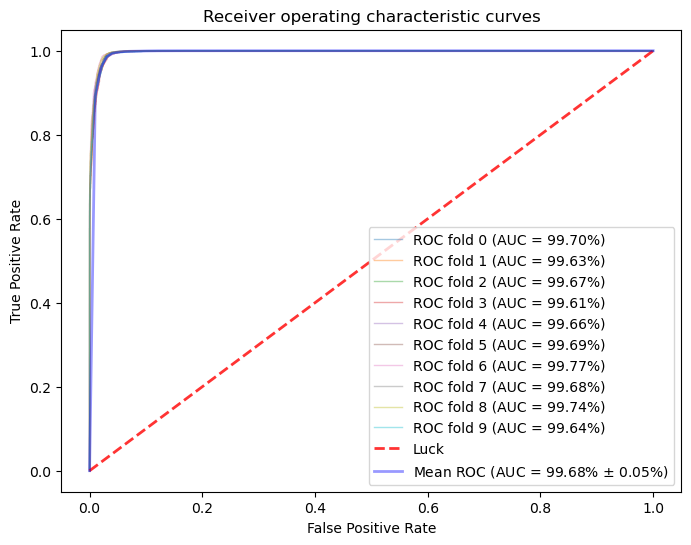

/tmp/ipykernel_450/777249213.py:98: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('YlGnBu')


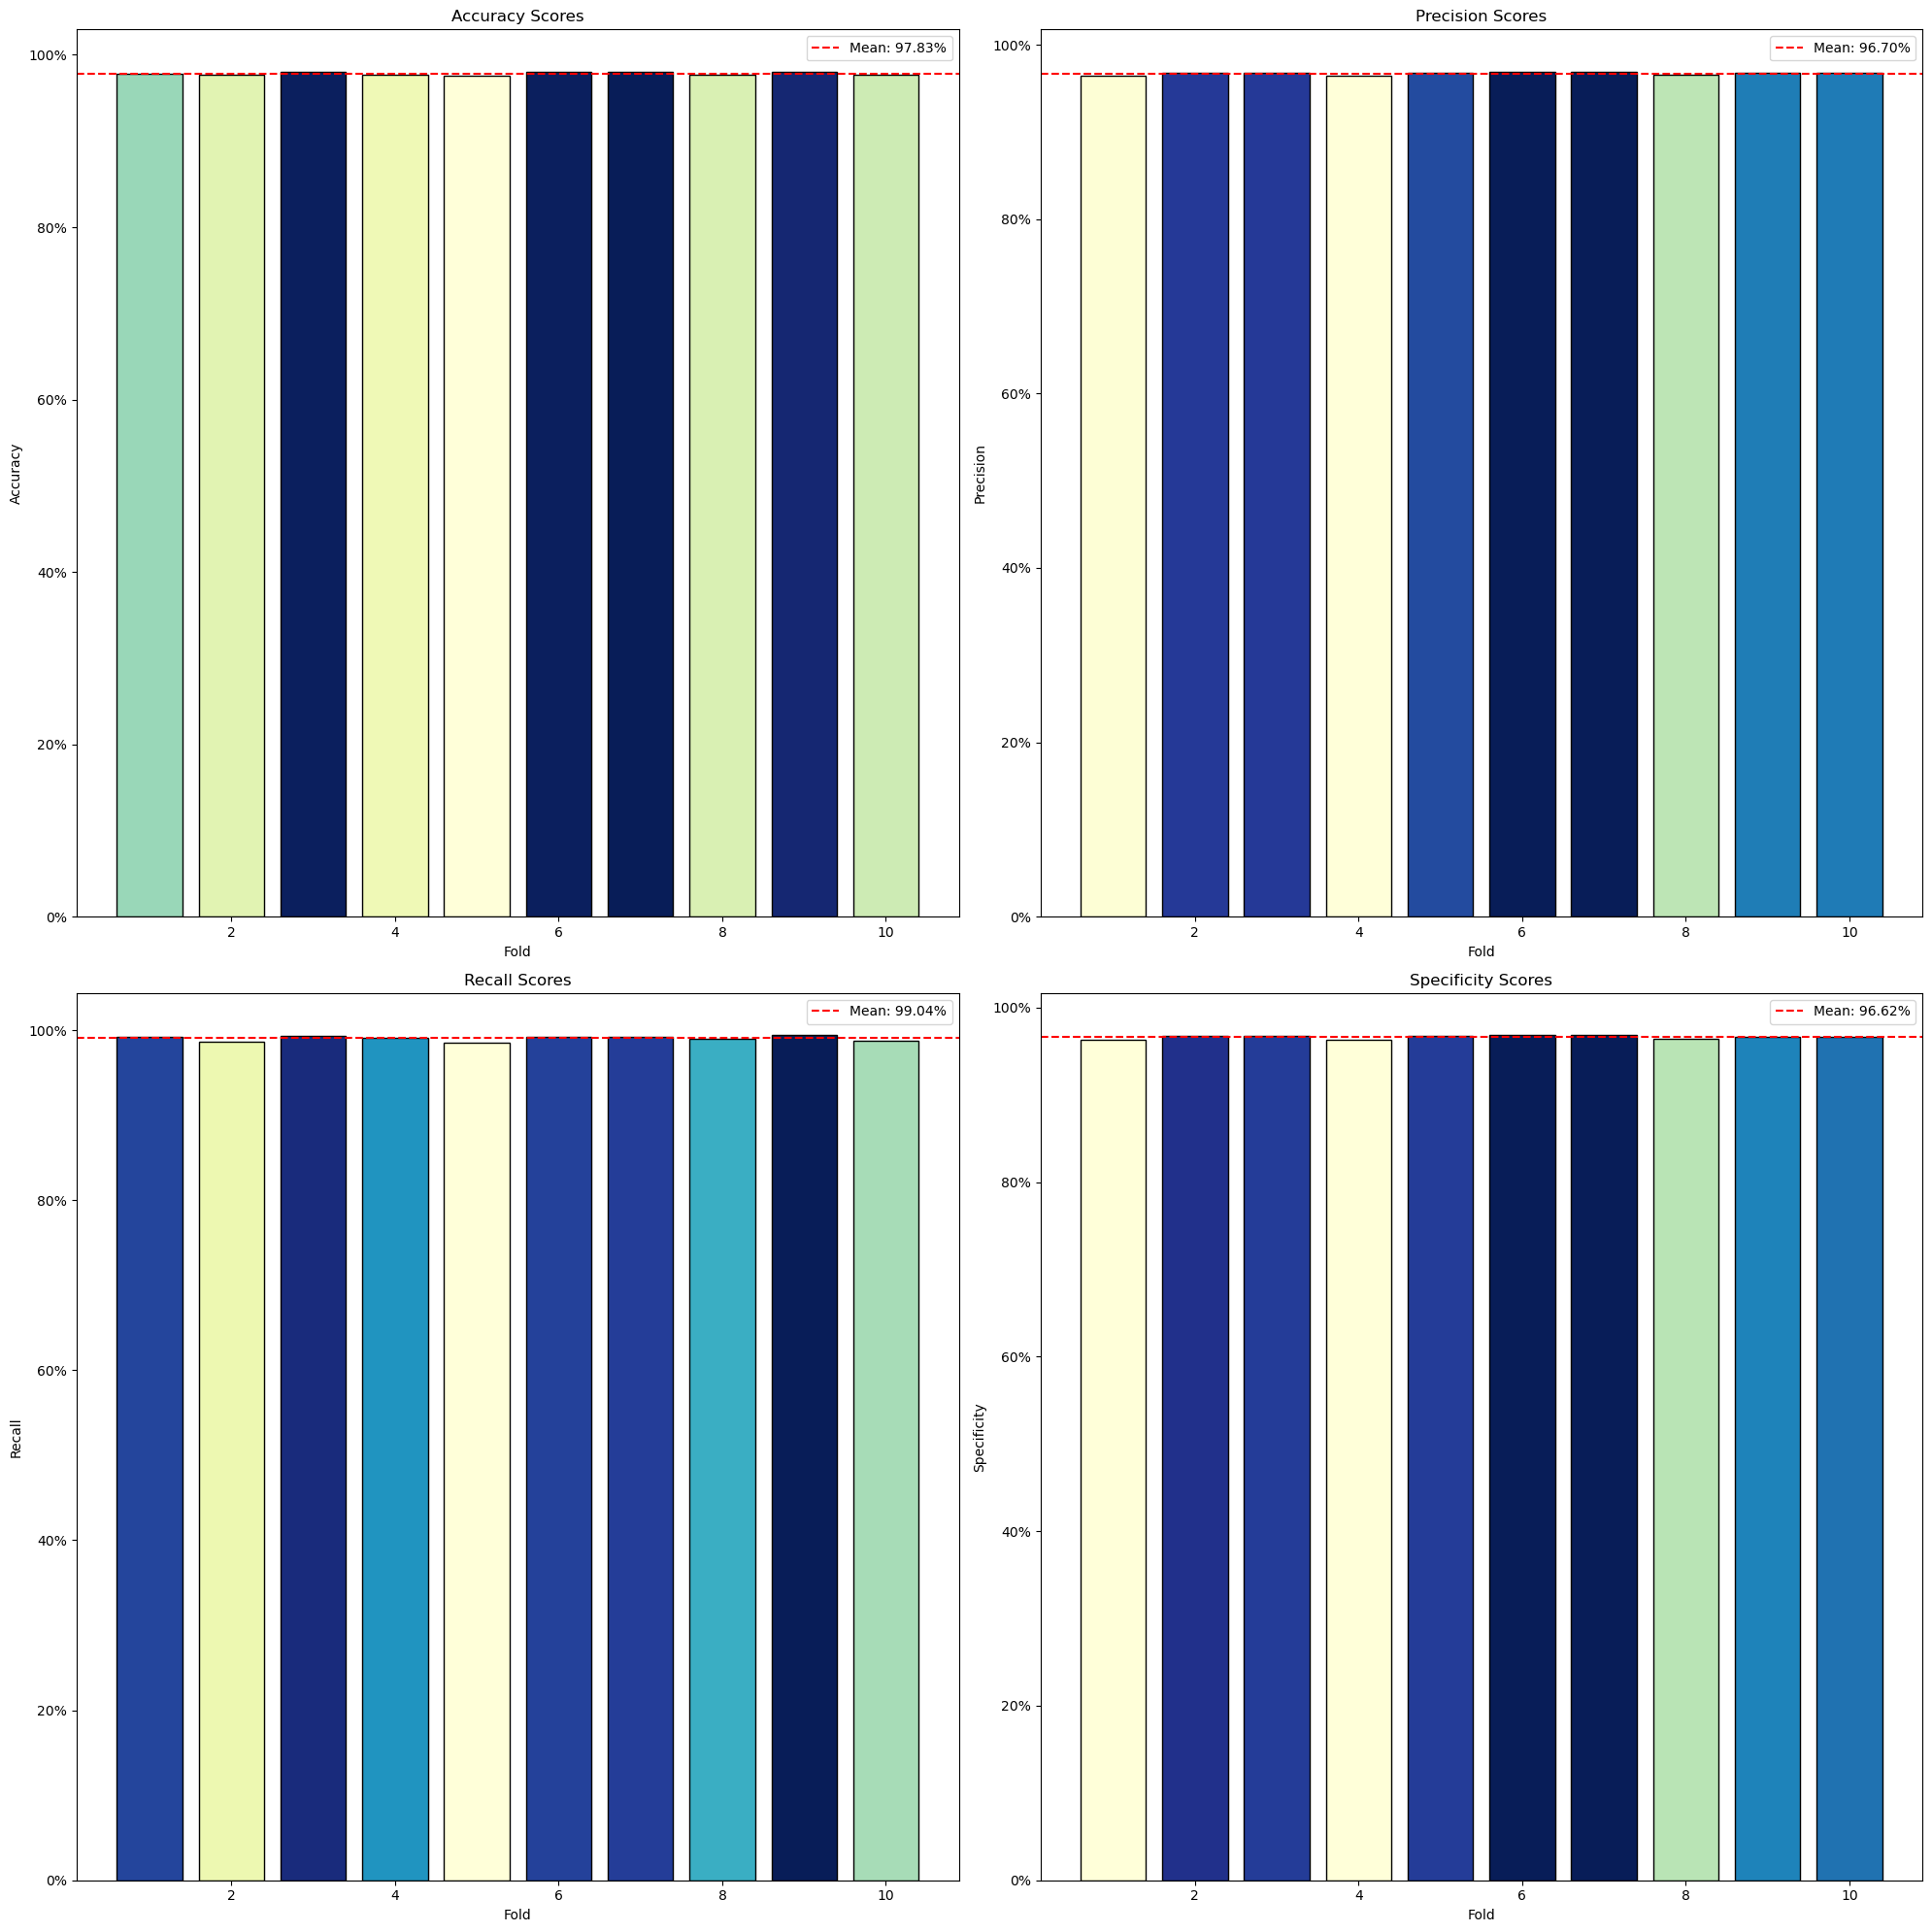

Standard Deviation of Accuracy Scores: 0.0016660728312300245
Standard Deviation of Precision Scores: 0.0018399495838515077
Standard Deviation of Specificity Scores: 0.001962846876540053
Standard Deviation of Recall Scores: 0.0029260846300782806


In [11]:
learning_rate= [0.0001]
activation_function=['tanh']
init=['uniform']
neuron1=[128]
neuron2=[64]
epochs=[1000]
batch_size=[100]

for lr in learning_rate:
    for af in activation_function:
        for init_mode in init:
            for n1 in neuron1:
                for n2 in neuron2:
                    for ep in epochs:
                        for bs in batch_size:
                            print(f"Running model with learning_rate={lr}, activation_function={af}, init={init_mode}, neuron1={n1}, neuron2={n2}, epochs={ep}, batch_size={bs}")
                            neural_network_and_ROC(X_array, y_array, learning_rate=lr, activation_function=af, init=init_mode, neuron1=n1, neuron2=n2, epochs=ep, batch_size=bs,name='CV_allshape')
    
    
    

# Best parametre shape

In [12]:
# define dataset
X1=df[['RDAmpM','RDAmpSD', 'QRsa', 'QRaSD']]
y1=df["label"]
X,y=smooth(X1,y1)
X_array = X.values
y_array = y.values.ravel()

Counter({'NotVF': 88487, 'VF': 6741})
Counter({'NotVF': 88487, 'VF': 88487})


Running model with learning_rate=0.0001, activation_function=tanh, init=uniform, neuron1=128, neuron2=64, epochs=1000, batch_size=150
['NotVF' 'NotVF' 'NotVF' ... 'VF' 'VF' 'VF']
[0 0 0 ... 1 1 1]
Validation score improved (inf --> 24.8113). Saving model!
Validation score improved (24.8113 --> 19.2692). Saving model!
Validation score improved (19.2692 --> 2.5054). Saving model!
Validation score improved (2.5054 --> 1.0351). Saving model!
Validation score improved (1.0351 --> 0.6282). Saving model!
Validation score improved (0.6282 --> 0.5849). Saving model!
Validation score improved (0.5849 --> 0.5117). Saving model!
Validation score improved (0.5117 --> 0.3027). Saving model!
Validation score improved (0.3027 --> 0.2407). Saving model!
Validation score improved (0.2407 --> 0.2228). Saving model!
Validation score improved (0.2228 --> 0.2110). Saving model!
Validation score improved (0.2110 --> 0.1999). Saving model!
Validation score improved (0.1999 --> 0.1926). Saving model!
Validatio

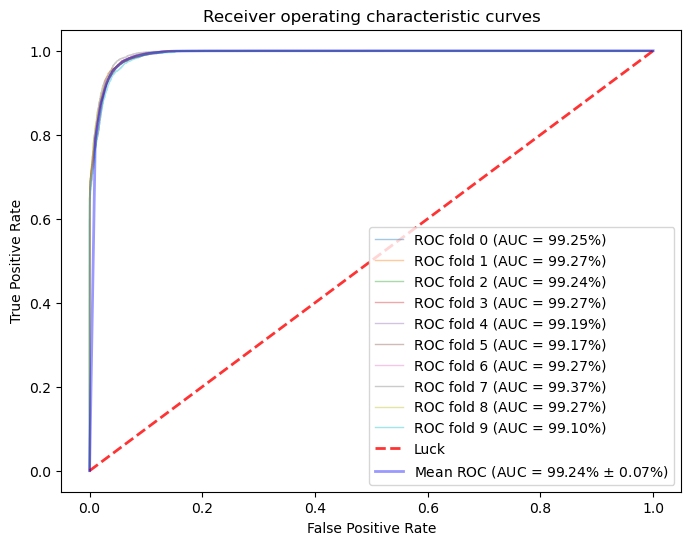

/tmp/ipykernel_450/777249213.py:98: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('YlGnBu')


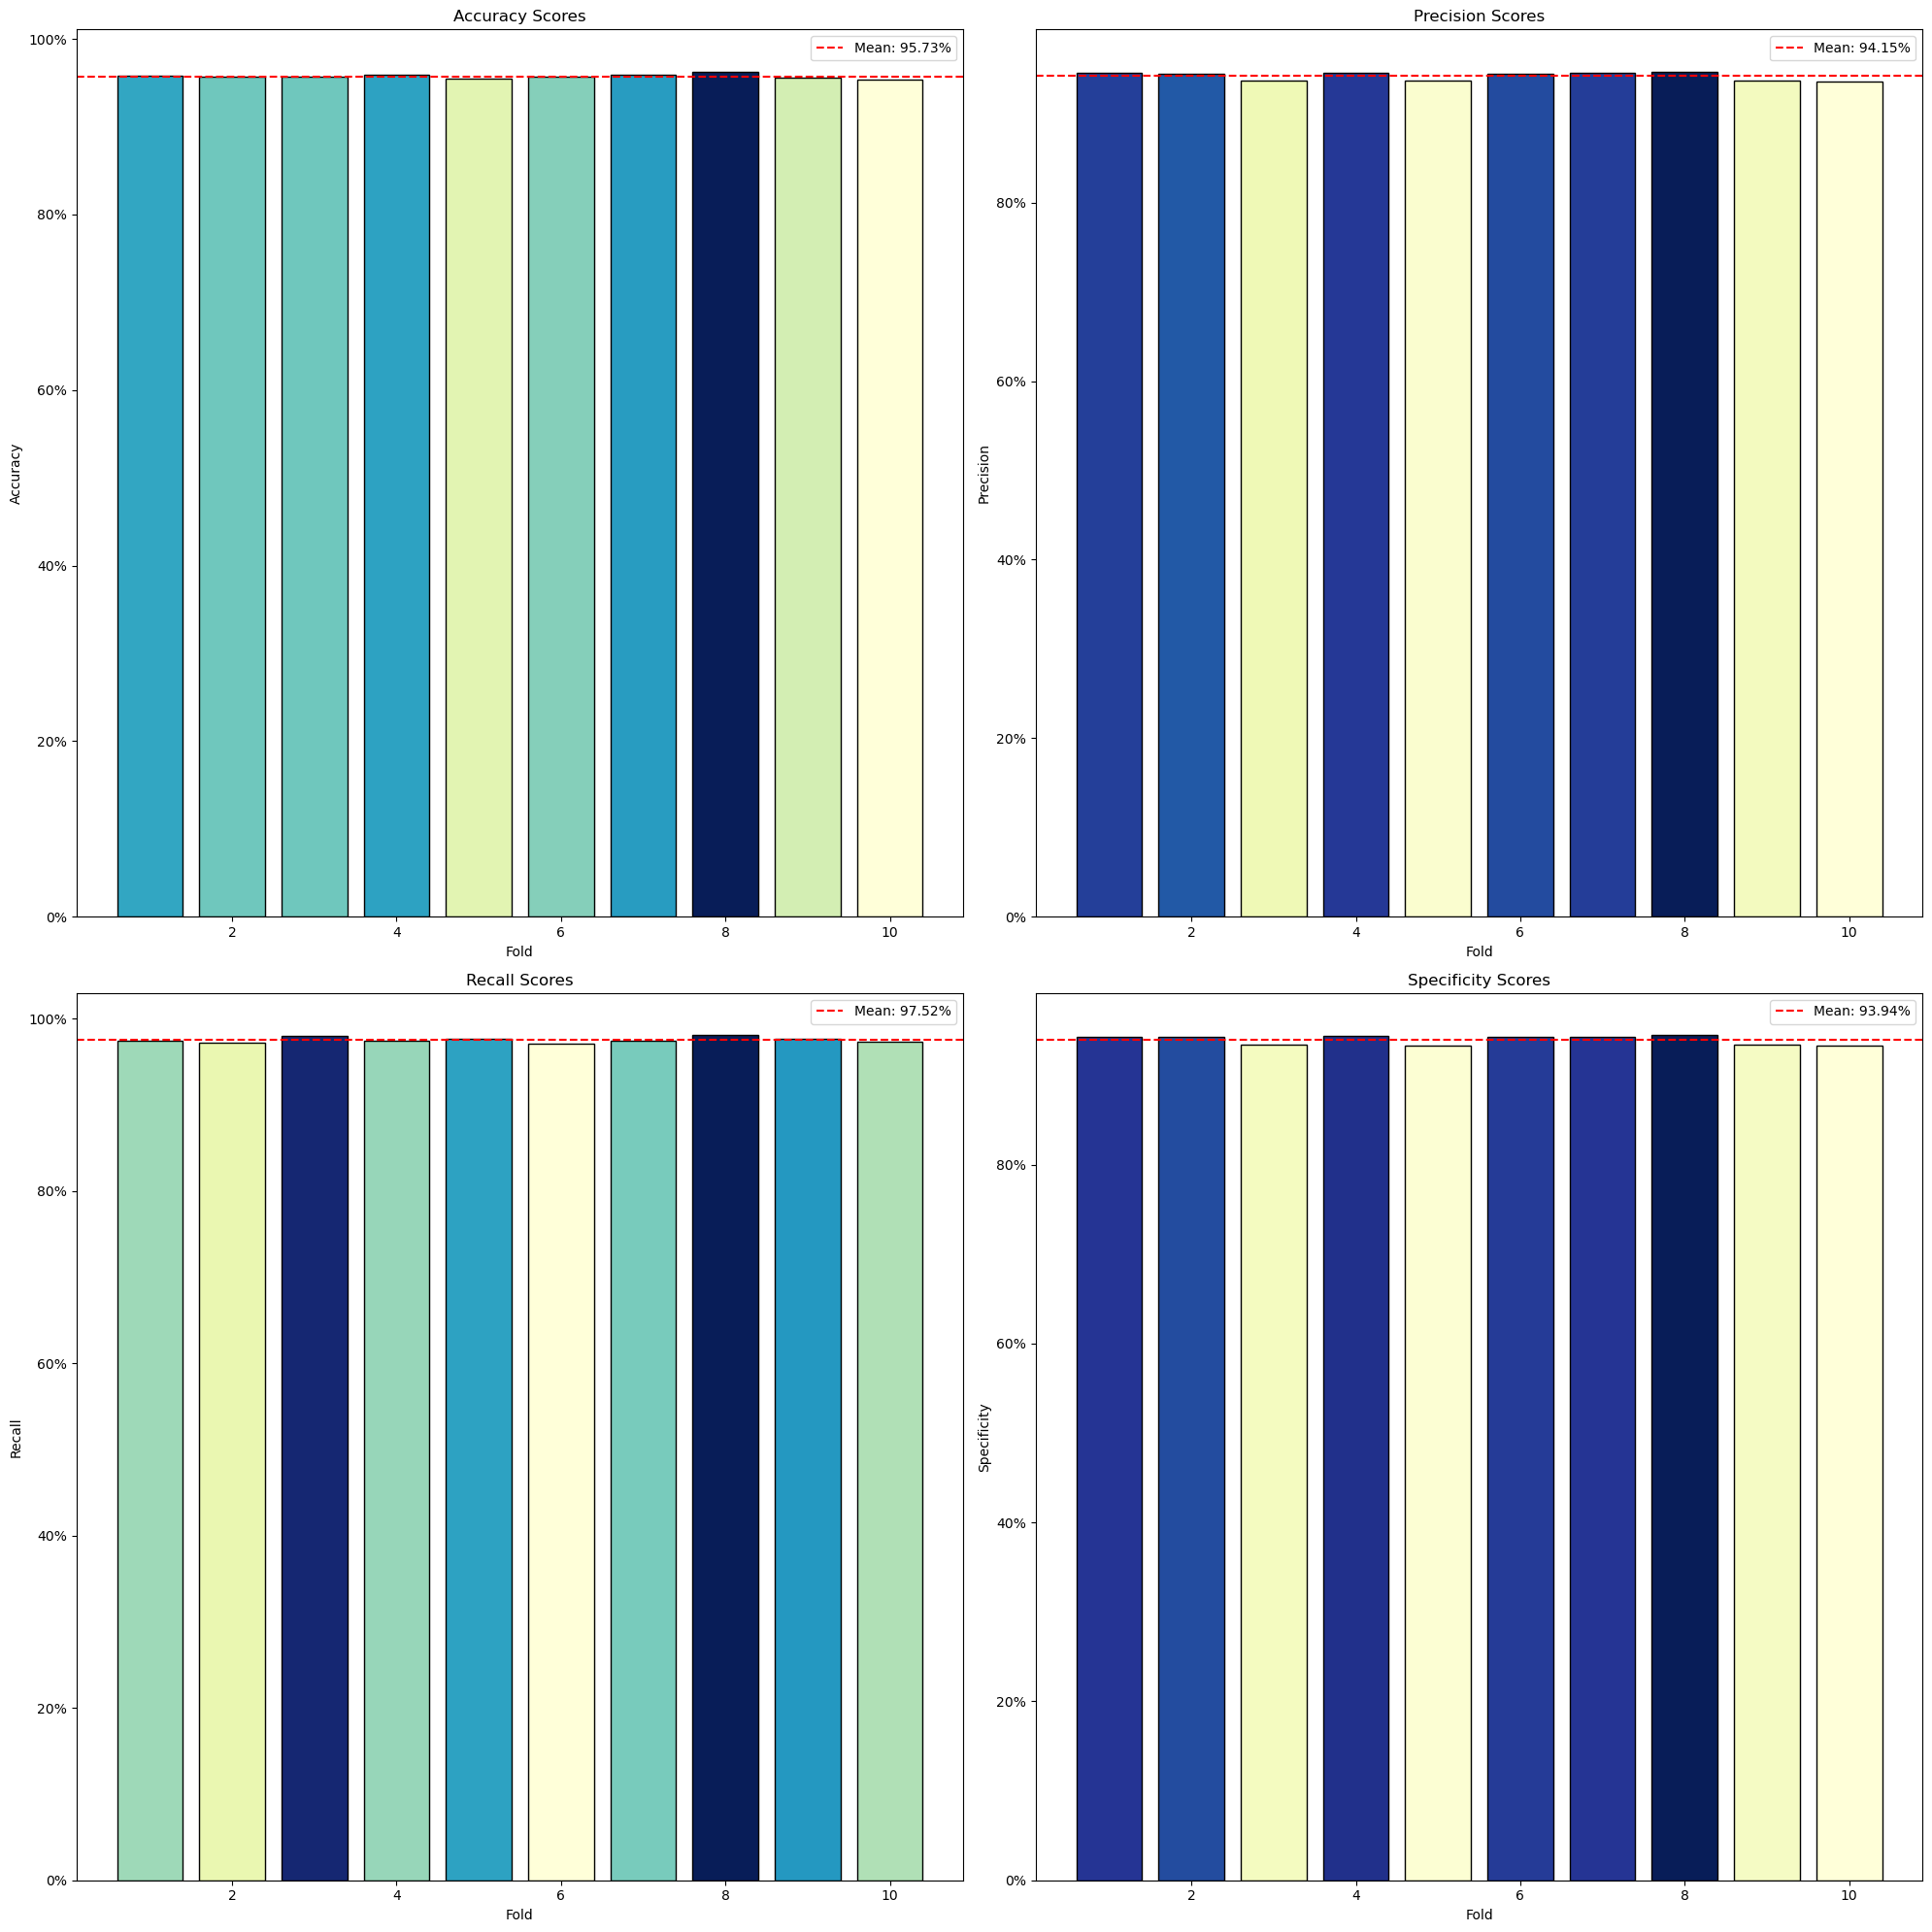

Standard Deviation of Accuracy Scores: 0.0024543204344815617
Standard Deviation of Precision Scores: 0.004242857710709146
Standard Deviation of Specificity Scores: 0.0047289847207867015
Standard Deviation of Recall Scores: 0.003126824220187683


In [13]:
learning_rate= [0.0001]
activation_function=['tanh']
init=['uniform']
neuron1=[128]
neuron2=[64]
epochs=[1000]
batch_size=[150]

for lr in learning_rate:
    for af in activation_function:
        for init_mode in init:
            for n1 in neuron1:
                for n2 in neuron2:
                    for ep in epochs:
                        for bs in batch_size:
                            print(f"Running model with learning_rate={lr}, activation_function={af}, init={init_mode}, neuron1={n1}, neuron2={n2}, epochs={ep}, batch_size={bs}")
                            neural_network_and_ROC(X_array, y_array, learning_rate=lr, activation_function=af, init=init_mode, neuron1=n1, neuron2=n2, epochs=ep, batch_size=bs,name='shape')

# Best parametre hrv  

In [14]:
X1=df[['RDAmpM','mean_rr','sdsd', 'pnn50','rmssd', 'sdnn','hf_power']]
y1=df["label"]
X,y=smooth(X1,y1)
X_array = X.values
y_array = y.values.ravel()

Counter({'NotVF': 88487, 'VF': 6741})
Counter({'NotVF': 88487, 'VF': 88487})


Running model with learning_rate=0.001, activation_function=tanh, init=uniform, neuron1=256, neuron2=128, epochs=1000, batch_size=100
['NotVF' 'NotVF' 'NotVF' ... 'VF' 'VF' 'VF']
[0 0 0 ... 1 1 1]
Validation score improved (inf --> 0.6120). Saving model!
Validation score improved (0.6120 --> 0.3381). Saving model!
Validation score improved (0.3381 --> 0.2757). Saving model!
Validation score improved (0.2757 --> 0.2252). Saving model!
Validation score improved (0.2252 --> 0.2039). Saving model!
Validation score improved (0.2039 --> 0.1928). Saving model!
Validation score improved (0.1928 --> 0.1831). Saving model!
Validation score improved (0.1831 --> 0.1787). Saving model!
Validation score improved (0.1787 --> 0.1731). Saving model!
Validation score improved (0.1731 --> 0.1718). Saving model!
Validation score improved (0.1718 --> 0.1712). Saving model!
Validation score improved (0.1712 --> 0.1663). Saving model!
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
Vali

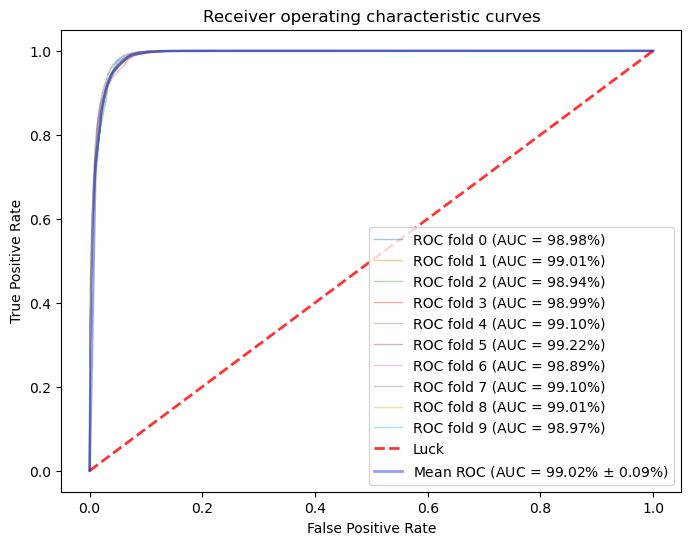

/tmp/ipykernel_450/777249213.py:98: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('YlGnBu')


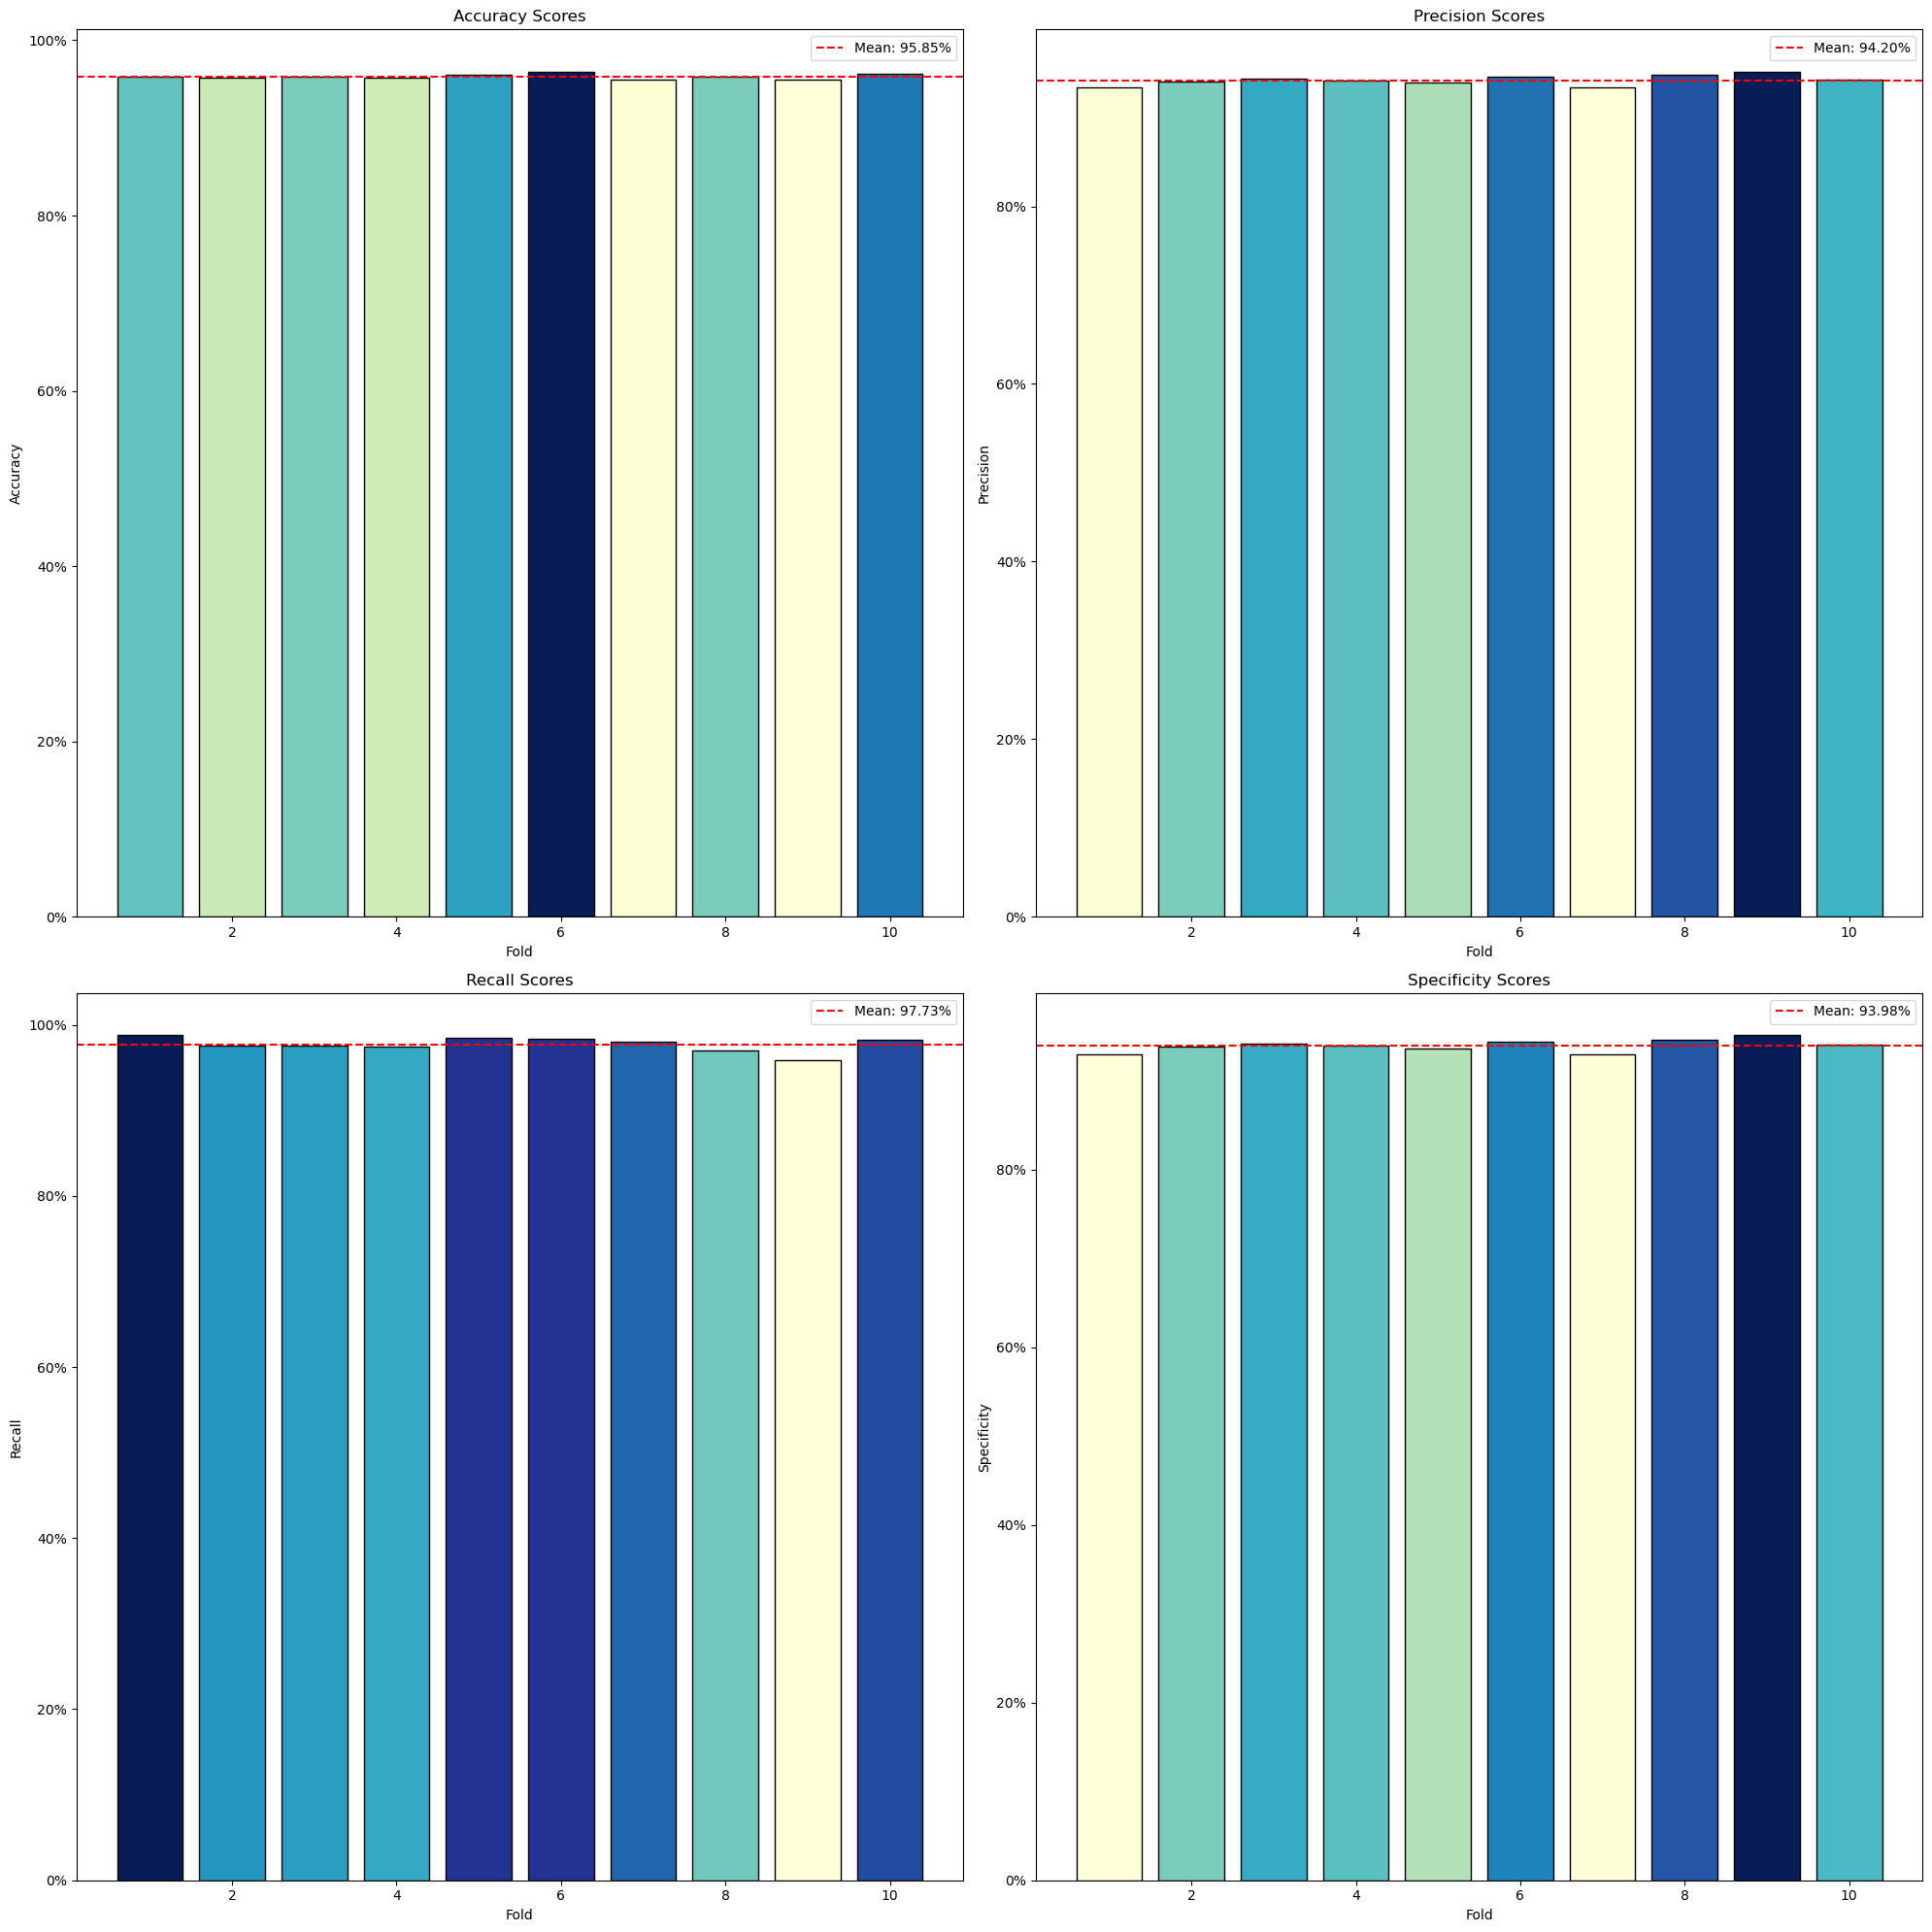

Standard Deviation of Accuracy Scores: 0.0026576222155146466
Standard Deviation of Precision Scores: 0.005427662808088743
Standard Deviation of Specificity Scores: 0.006322660052275805
Standard Deviation of Recall Scores: 0.008060610789482739


In [15]:
learning_rate= [0.001]
activation_function=['tanh']
init=['uniform']
neuron1=[256]
neuron2=[128]
epochs=[1000]
batch_size=[100]
batch_size=[100]

for lr in learning_rate:
    for af in activation_function:
        for init_mode in init:
            for n1 in neuron1:
                for n2 in neuron2:
                    for ep in epochs:
                        for bs in batch_size:
                            print(f"Running model with learning_rate={lr}, activation_function={af}, init={init_mode}, neuron1={n1}, neuron2={n2}, epochs={ep}, batch_size={bs}")
                            neural_network_and_ROC(X_array, y_array, learning_rate=lr, activation_function=af, init=init_mode, neuron1=n1, neuron2=n2, epochs=ep, batch_size=bs,name='hrv')